### KNN - K Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib notebook

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.2):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    Plot the decision surface region
    """
    
    x1_min, x1_max = X[:,0].min(), X[:,0].max()
    x2_min, x2_max = X[:,1].min(), X[:,1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([np.ravel(xx1), np.ravel(xx2)]).T)
    Z = Z.reshape(xx1.shape)
    _ = plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    _ = plt.xlim(xx1.min(), xx1.max())
    _ = plt.ylim(xx2.min(), xx2.max())
    
    """
    Plot sample points
    """
    X_test, y_test = X[test_idx, 0], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        _ = plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1], marker=markers[idx], c=cmap(idx), label=c1)
    
    """
    Highlight test points
    """
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='gray', alpha=0.8, linewidth=1, marker='o', s=55, label='test set')

In [6]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
y_pred = knn.predict(X_test_std)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.3f" %(accuracy_score(y_pred, y_test)*100))

Accuracy: 100.000


<IPython.core.display.Javascript object>


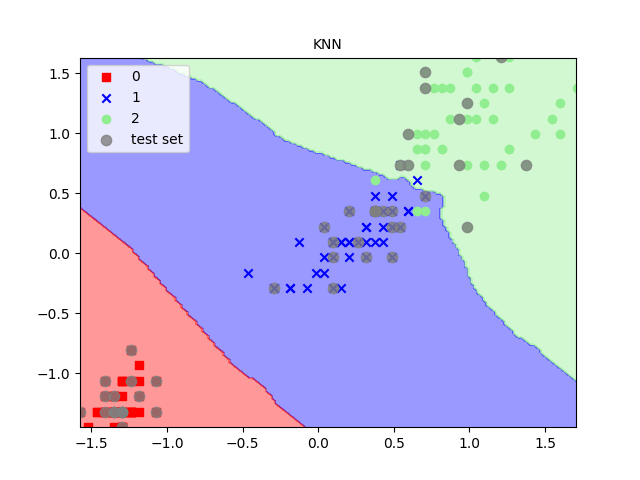

In [11]:
_ = plot_decision_region(X_combined_std, y_combined_std, classifier=knn, resolution=0.02, test_idx=range(105,150))
_ = plt.title('KNN', fontsize=10)
_ = plt.legend()